In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
from skimage.feature import hog
import numpy as np
from PIL import Image
from keras.utils import pad_sequences
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        images.append(img)
    return images

In [ ]:
im = load_images_from_folder('Hoda 0-9')

In [ ]:
x = im

In [ ]:
len(max(x, key=len))

130

In [ ]:
y = []
for i in range(155):
  y.append(4)
for i in range(170):
  y.append(5)
for i in range(174):
  y.append(6)
for i in range(173):
  y.append(7)
for i in range(169):
  y.append(8)
for i in range(159):
  y.append(9)
for i in range(104):
  y.append(0)
for i in range(102):
  y.append(1)
for i in range(71):
  y.append(0)
for i in range(69):
  y.append(1)
for i in range(163):
  y.append(2)
for i in range(171):
  y.append(3)
for i in range(18):
  y.append(4)

In [ ]:
x = np.array(x)
y = np.array(y)

<ipython-input-9-eab93f439266>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


In [ ]:
for i in range(1698):
  x[i] = pad_sequences(x[i],130)

In [ ]:
x = pad_sequences(x,130)

In [ ]:
x.shape

(1698, 130, 130, 3)

In [ ]:
x = x[:, :, :, 0]

In [ ]:
x.shape

(1698, 130, 130)

In [ ]:
y.shape

(1698,)

9


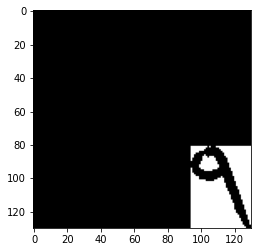

In [ ]:
print(y[900]) 
plt.imshow(x[900], cmap='gray')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2, random_state=None)

In [ ]:
len(x_train)

1358

In [ ]:
len(y_train)

1358

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 130, 130, 1)
x_test = x_test.reshape(x_test.shape[0], 130, 130, 1)
input_shape = (130, 130, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value. changing the range from 0-255 to 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (1358, 130, 130, 1)
Number of images in x_train 1358
Number of images in x_test 340


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import classification_report
import random
import numpy as np

In [ ]:
model = []
model.append(Sequential())
model.append(Sequential())
model.append(Sequential())
model.append(Sequential())

dropout = [0.1,0.2]
for i in range(2):
    model[i].add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model[i].add(MaxPooling2D(pool_size=(2, 2)))
    model[i].add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model[i].add(Dense(128, activation=tf.nn.relu))
    model[i].add(Dropout(dropout[i]))
    model[i].add(Dense(10,activation=tf.nn.softmax))

In [ ]:
for i in range(2):
    model[i].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model[i].fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 10s 220ms/step - loss: 2.0135 - accuracy: 0.3984
Epoch 2/10
43/43 [==============================] - 9s 217ms/step - loss: 0.9670 - accuracy: 0.6708
Epoch 3/10
43/43 [==============================] - 9s 220ms/step - loss: 0.6215 - accuracy: 0.7842
Epoch 4/10
43/43 [==============================] - 9s 217ms/step - loss: 0.4369 - accuracy: 0.8682
Epoch 5/10
43/43 [==============================] - 9s 218ms/step - loss: 0.2939 - accuracy: 0.9197
Epoch 6/10
43/43 [==============================] - 9s 218ms/step - loss: 0.1906 - accuracy: 0.9507
Epoch 7/10
43/43 [==============================] - 9s 218ms/step - loss: 0.1359 - accuracy: 0.9691
Epoch 8/10
43/43 [==============================] - 9s 218ms/step - loss: 0.0997 - accuracy: 0.9831
Epoch 9/10
43/43 [==============================] - 9s 216ms/step - loss: 0.0693 - accuracy: 0.9882
Epoch 10/10
43/43 [==============================] - 9s 218ms/step - loss: 0.0549 - accuracy: 0.991

In [ ]:
y_test

array([3, 4, 1, 2, 6, 4, 7, 1, 9, 9, 0, 1, 4, 4, 0, 8, 7, 1, 7, 3, 2, 8,
       0, 2, 8, 0, 4, 3, 5, 5, 0, 8, 5, 3, 7, 8, 3, 8, 1, 5, 9, 1, 6, 8,
       7, 1, 3, 4, 4, 3, 9, 5, 2, 8, 4, 2, 4, 0, 0, 9, 6, 7, 5, 3, 0, 5,
       0, 6, 5, 6, 2, 9, 6, 1, 7, 0, 5, 1, 3, 5, 3, 8, 6, 2, 5, 9, 2, 8,
       4, 6, 9, 8, 4, 4, 6, 1, 9, 5, 7, 2, 4, 8, 7, 7, 8, 6, 5, 9, 9, 9,
       3, 5, 0, 6, 1, 9, 5, 6, 4, 3, 2, 1, 6, 7, 6, 1, 6, 1, 0, 6, 9, 3,
       4, 6, 4, 8, 4, 8, 5, 0, 5, 4, 6, 9, 7, 9, 7, 5, 1, 7, 3, 2, 4, 4,
       9, 7, 1, 4, 9, 7, 1, 3, 0, 3, 0, 5, 3, 6, 8, 0, 1, 8, 6, 9, 4, 3,
       8, 7, 5, 9, 9, 0, 7, 6, 2, 4, 2, 7, 8, 0, 3, 7, 9, 2, 4, 7, 4, 5,
       7, 1, 1, 3, 8, 5, 4, 5, 8, 6, 6, 0, 3, 4, 9, 6, 2, 1, 0, 8, 1, 3,
       8, 5, 2, 1, 2, 0, 7, 0, 2, 6, 0, 4, 1, 4, 8, 6, 8, 3, 9, 7, 3, 8,
       9, 0, 9, 5, 6, 6, 2, 0, 6, 1, 3, 7, 7, 9, 5, 6, 8, 7, 1, 8, 8, 4,
       1, 2, 5, 1, 7, 3, 3, 9, 5, 9, 8, 1, 3, 0, 0, 5, 3, 9, 1, 6, 2, 2,
       7, 0, 3, 8, 3, 5, 5, 2, 4, 0, 8, 5, 0, 3, 6,

1/1 [==============================] - 0s 81ms/step
Predicted label: 7 
With the probability of 0.999079
1/1 [==============================] - 0s 48ms/step
Predicted label: 7 
With the probability of 0.99874747


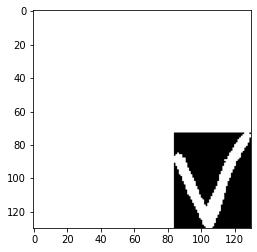

In [ ]:
image_index = 6
plt.imshow(x_test[6].reshape(130, 130),cmap='Greys')
for i in range(2):
    pred = model[i].predict(x_test[image_index].reshape(1, 130, 130, 1))
    # Maximum probability
    print("Predicted label:",pred.argmax(),"\nWith the probability of",pred[0][pred.argmax()])